# Dow-Jones Index Explanatory Data Analysis

The Dow Jones Industrial Average, Dow Jones, or simply the Dow, is a stock market index of 30 prominent companies listed on stock exchanges in the United States.


In [1]:
from predict import Predictor
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams['figure.figsize'] = [4.5, 3.5]

%matplotlib inline
pd.options.display.max_rows = 2000
pd.options.display.max_columns = 100

import warnings
warnings.filterwarnings('ignore')

predictor = Predictor()

Import dataset and put it in the pandas data-frame for further processing.


In [2]:
# https://archive.ics.uci.edu/dataset/312/dow+jones+index
df = pd.read_csv("../datasets/dow_jones_index/dow_jones_index.data")

df["percent_change_volume_over_last_wk"] = df[
    "percent_change_volume_over_last_wk"
].fillna(0)
df["previous_weeks_volume"] = df["previous_weeks_volume"].fillna(0)

df.head(10)

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.792670,0.000000,0.0,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.428490,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.470660,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.638310,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.933250,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
5,1,AA,2/11/2011,$17.33,$17.48,$16.97,$17.37,114691279,0.230814,-25.712195,154387761.0,$17.39,$17.28,-0.632547,90,0.172712
6,1,AA,2/18/2011,$17.39,$17.68,$17.28,$17.28,80023895,-0.632547,-30.226696,114691279.0,$16.98,$16.68,-1.766780,83,0.173611
7,1,AA,2/25/2011,$16.98,$17.15,$15.96,$16.68,132981863,-1.766780,66.177694,80023895.0,$16.81,$16.58,-1.368230,76,0.179856
8,1,AA,3/4/2011,$16.81,$16.94,$16.13,$16.58,109493077,-1.368230,-17.663150,132981863.0,$16.58,$16.03,-3.317250,69,0.180941
9,1,AA,3/11/2011,$16.58,$16.75,$15.42,$16.03,114332562,-3.317250,4.419900,109493077.0,$15.95,$16.11,1.003130,62,0.187149


Cleanup data and convert to numeric values.


In [3]:
df["date"] = pd.to_datetime(df["date"])
df["open"] = df["open"].replace("[\$,]", "", regex=True).astype(float)
df["high"] = df["high"].replace("[\$,]", "", regex=True).astype(float)
df["low"] = df["low"].replace("[\$,]", "", regex=True).astype(float)
df["close"] = df["close"].replace("[\$,]", "", regex=True).astype(float)

Pick multiple stock from unrelated company categories including technology, retail, Food industry and bank.


In [4]:
msft = df[df["stock"] == "MSFT"]
csco = df[df["stock"] == "CSCO"]
ibm = df[df["stock"] == "IBM"]
wmt = df[df["stock"] == "WMT"]
mcd = df[df["stock"] == "MCD"]
jpm = df[df["stock"] == "JPM"]

Plot closed price of each stock, we can make sure that chosen stocks have different trends, Microsoft and cisco have decreasing trend, IBM and Mc Donald's have increasing trend, Walmart and JP morgan have volatile trend within the same period. So the chosen set of stocks are good measures for the next steps for the prediction and evaluation.


Text(0, 0.5, 'Price')

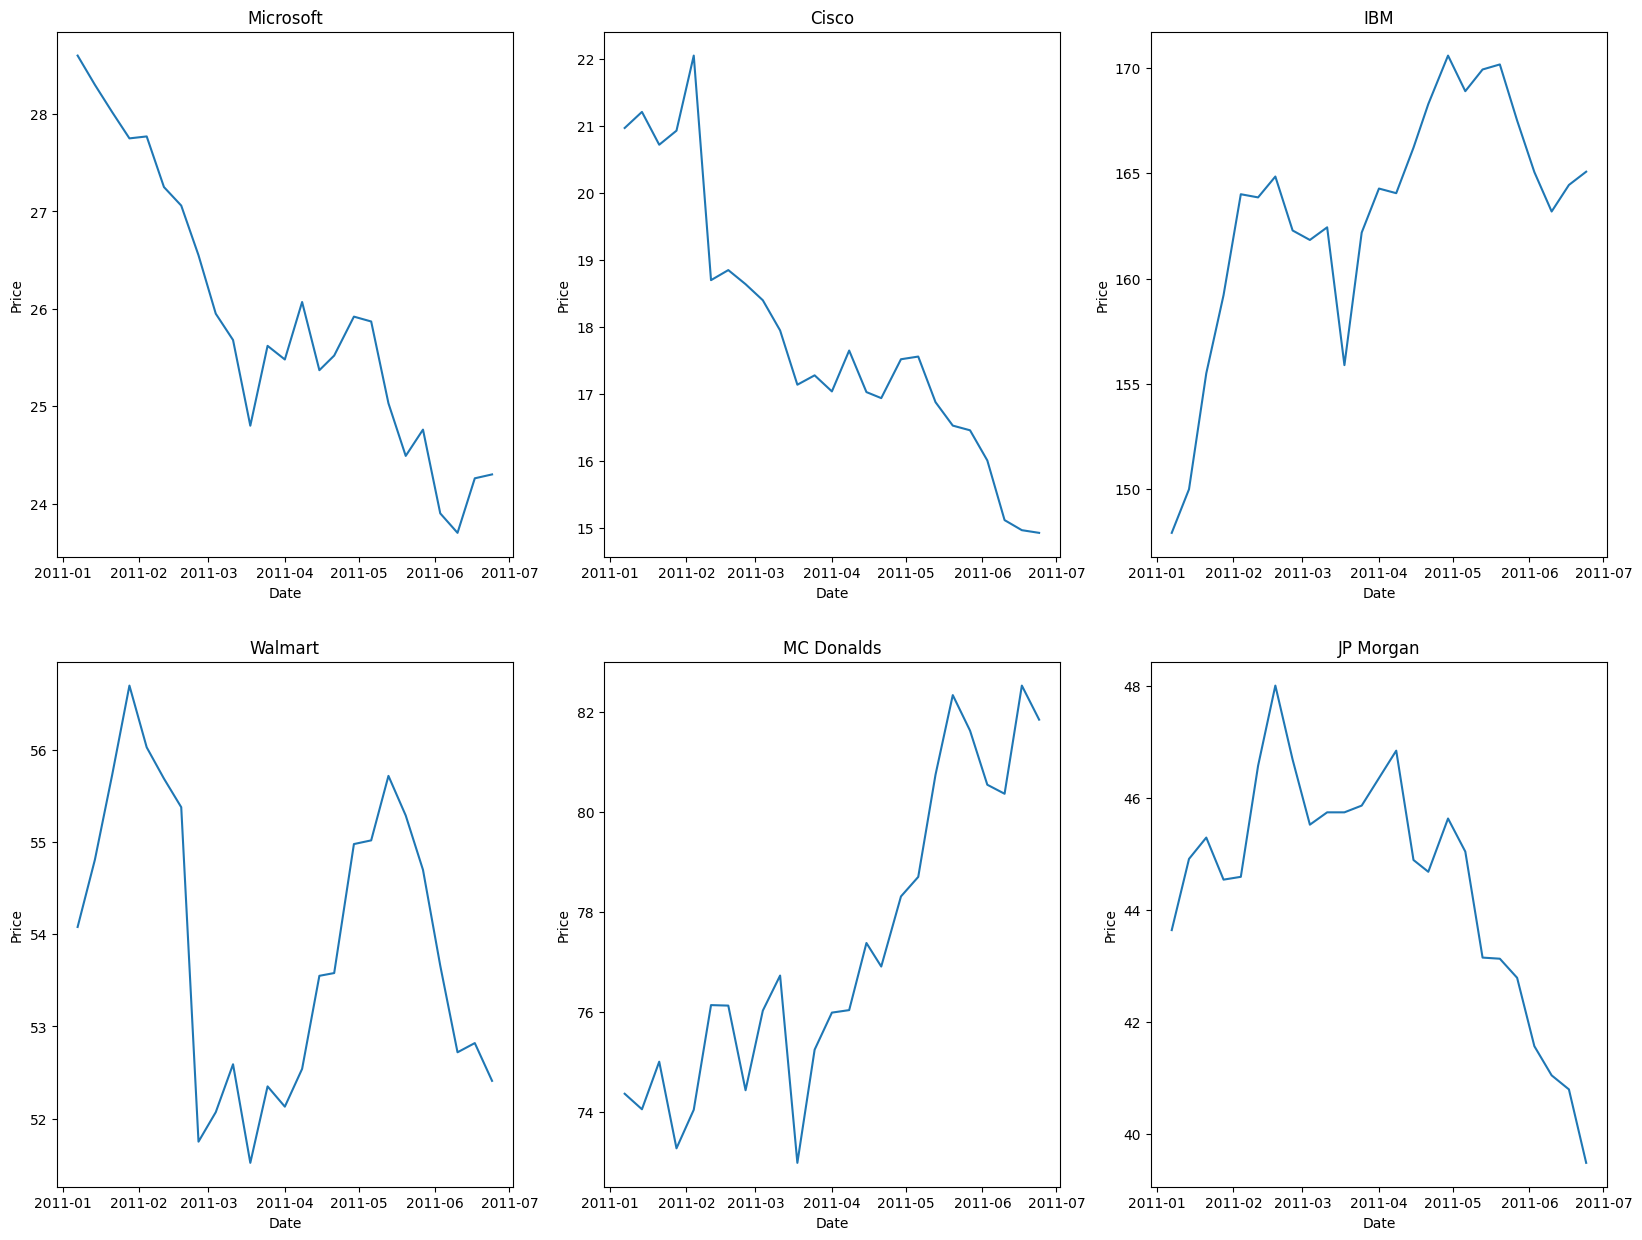

In [5]:
fig, ax = plt.subplots(2, 3, figsize=(20, 15))
ax[0, 0].plot(msft["date"], msft["close"])
ax[0, 0].set_title("Microsoft")
ax[0, 0].set_xlabel("Date")
ax[0, 0].set_ylabel("Price")

ax[0, 1].plot(csco["date"], csco["close"])
ax[0, 1].set_title("Cisco")
ax[0, 1].set_xlabel("Date")
ax[0, 1].set_ylabel("Price")

ax[0, 2].plot(ibm["date"], ibm["close"])
ax[0, 2].set_title("IBM")
ax[0, 2].set_xlabel("Date")
ax[0, 2].set_ylabel("Price")

ax[1, 0].plot(wmt["date"], wmt["close"])
ax[1, 0].set_title("Walmart")
ax[1, 0].set_xlabel("Date")
ax[1, 0].set_ylabel("Price")

ax[1, 1].plot(mcd["date"], mcd["close"])
ax[1, 1].set_title("MC Donalds")
ax[1, 1].set_xlabel("Date")
ax[1, 1].set_ylabel("Price")

ax[1, 2].plot(jpm["date"], jpm["close"])
ax[1, 2].set_title("JP Morgan")
ax[1, 2].set_xlabel("Date")
ax[1, 2].set_ylabel("Price")

Comparing the price change percentage over time, it shows that some of them have positive relation and some others have negative correlation. this can also help the model to have different trends within a certain period.


Text(0, 0.5, 'Volume')

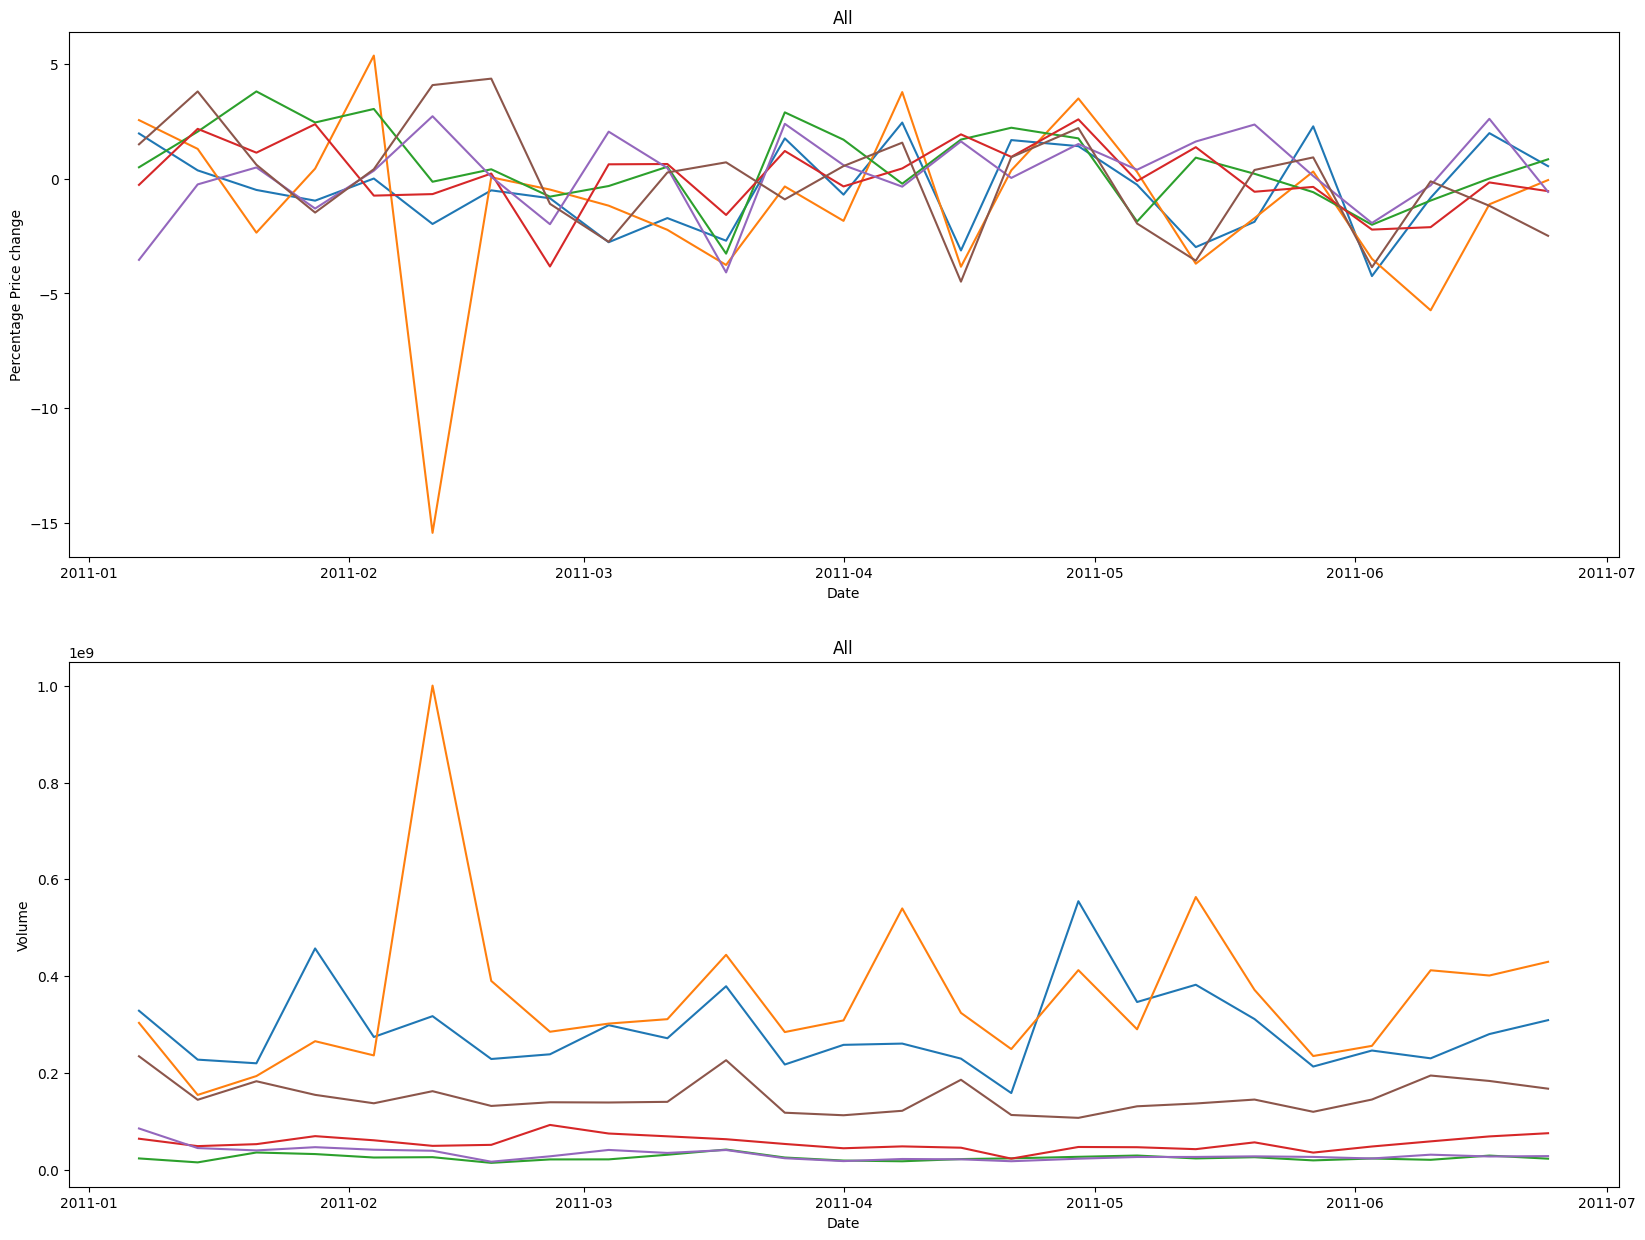

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(20, 15))
ax[0].plot(msft["date"], msft["percent_change_price"])
ax[0].plot(csco["date"], csco["percent_change_price"])
ax[0].plot(ibm["date"], ibm["percent_change_price"])
ax[0].plot(wmt["date"], wmt["percent_change_price"])
ax[0].plot(mcd["date"], mcd["percent_change_price"])
ax[0].plot(jpm["date"], jpm["percent_change_price"])
ax[0].set_title("All")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Percentage Price change")


ax[1].plot(msft["date"], msft["volume"])
ax[1].plot(csco["date"], csco["volume"])
ax[1].plot(ibm["date"], ibm["volume"])
ax[1].plot(wmt["date"], wmt["volume"])
ax[1].plot(mcd["date"], mcd["volume"])
ax[1].plot(jpm["date"], jpm["volume"])
ax[1].set_title("All")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Volume")

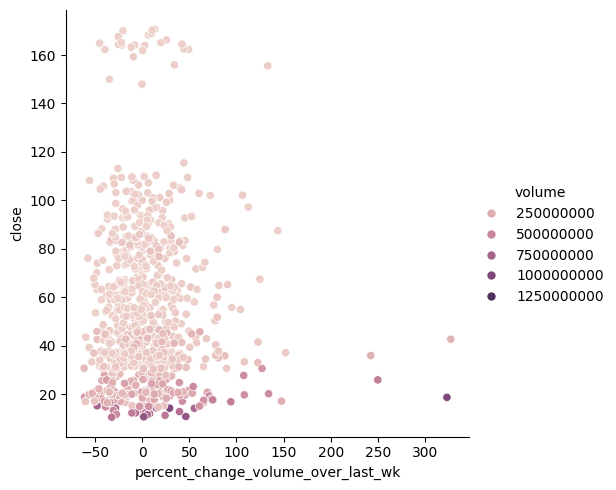

In [7]:
sns.relplot(data=df, x="percent_change_volume_over_last_wk", y="close", hue="volume")

## Heatmap

Since Open, High, Low, and Close prices are all related to the stock price, they don’t need to be included in the heatmap and correlation calculation. To identify the strongest correlation with the `close` price, we require historical data for prediction. Although the correlation between `percent_change_volume_over_last_wk` and `close` isn’t very high, it’s the only relevant information from the past. The heatmap below represents Microsoft’s data, but similar patterns exist for other stocks.


<Axes: >

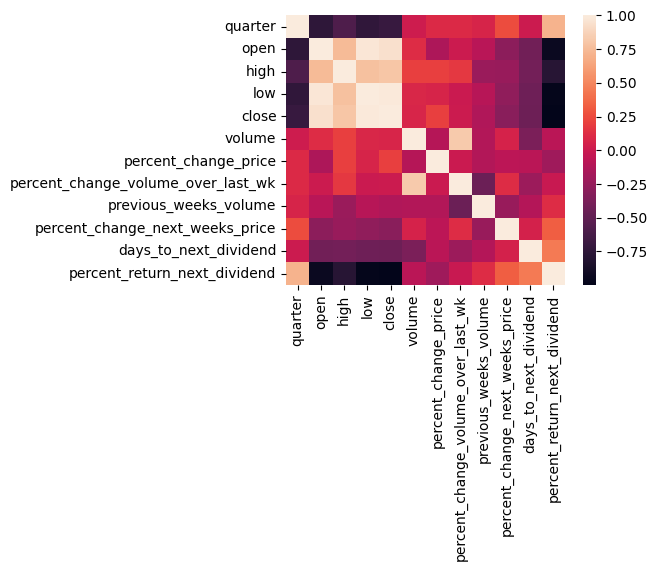

In [8]:
sns.heatmap(msft.corr(numeric_only=True))

The relationship between volume and price is negatively correlated; larger volumes tend to correspond to lower prices.


Text(0, 0.5, 'Volume')

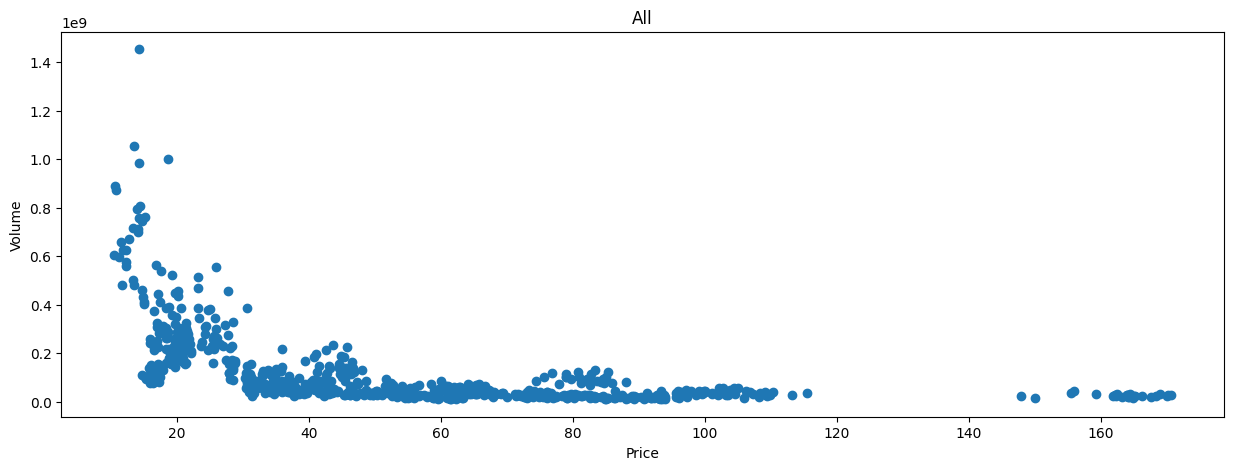

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.scatter(df["close"], df["volume"])
ax.set_title("All")
ax.set_xlabel("Price")
ax.set_ylabel("Volume")

Text(0, 0.5, 'Volume')

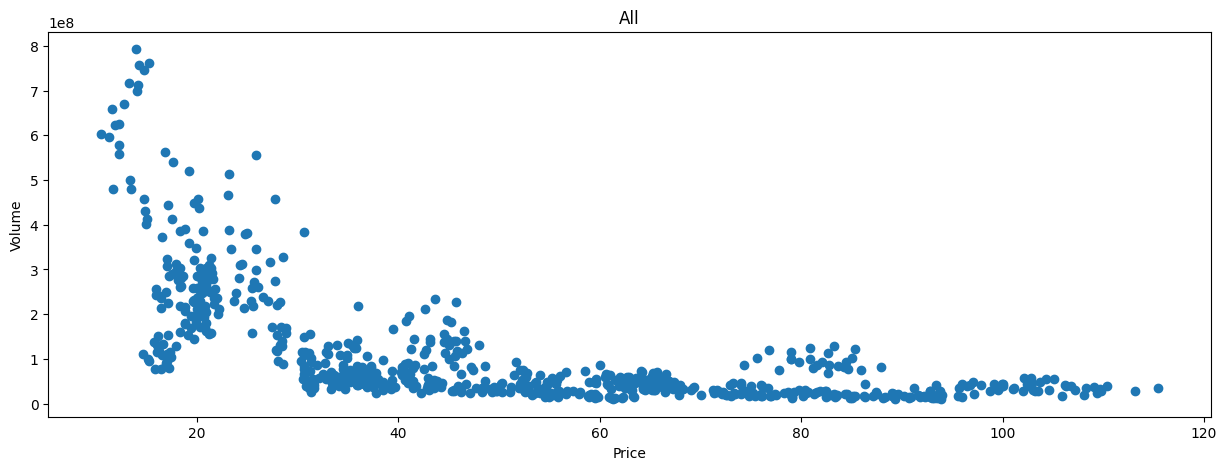

In [10]:
corr_df = df[(df["close"] < 120) & (df["volume"] < 800000000)]

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.scatter(corr_df["close"], corr_df["volume"])
ax.set_title("All")
ax.set_xlabel("Price")
ax.set_ylabel("Volume")

## Distribution

There is a significant correlation between price changes and the closing price, and it’s evident that the distribution of price changes follows a normal pattern.


Text(0, 0.5, 'Price')

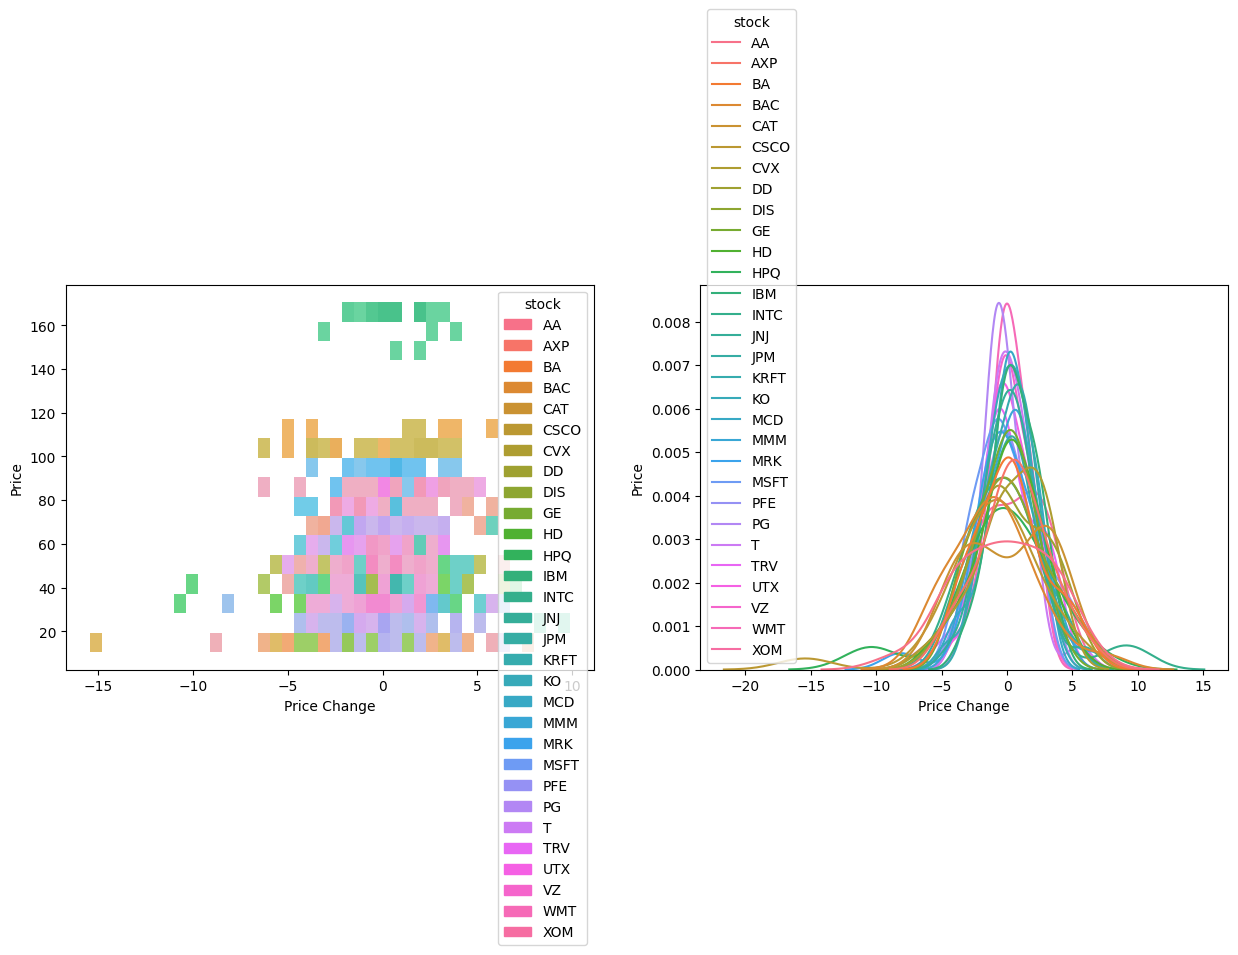

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data=df, x="percent_change_price", y="close", hue="stock", ax=ax[0])
ax[0].set_xlabel("Price Change")
ax[0].set_ylabel("Price")

sns.kdeplot(data=df, x="percent_change_price", hue="stock", ax=ax[1])
ax[1].set_xlabel("Price Change")
ax[1].set_ylabel("Price")

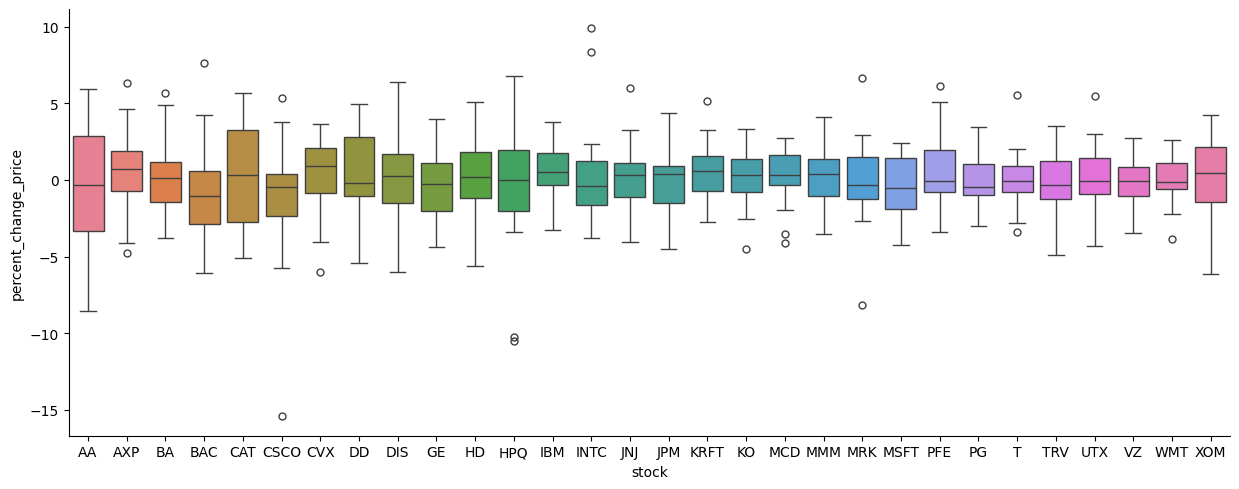

In [12]:
sns.catplot(
    data=df, x="stock", y="percent_change_price", kind="box", hue="stock", aspect=2.5
)

# Clustering


K-means clustering with 12 clusters provides a satisfactory fit to the recent week’s price changes and the current closing price.


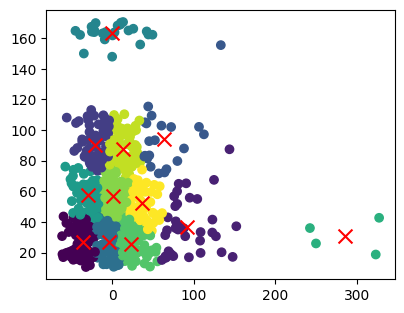

In [13]:
X = df[["percent_change_volume_over_last_wk", "close"]].values
n_clusters = 12
random_state = 2
kmeans_iters = 20
kmeans = KMeans(
    n_clusters=n_clusters,
    random_state=random_state,
    n_init=1,
    max_iter=kmeans_iters,
    init="random",
)
kmeans.fit(X)
y_pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    marker="x",
    c="r",
    s=100,
)

In the Elbow plot, it appears that 12 would be a reasonable estimate for the number of clusters.


Text(0, 0.5, 'SSE')

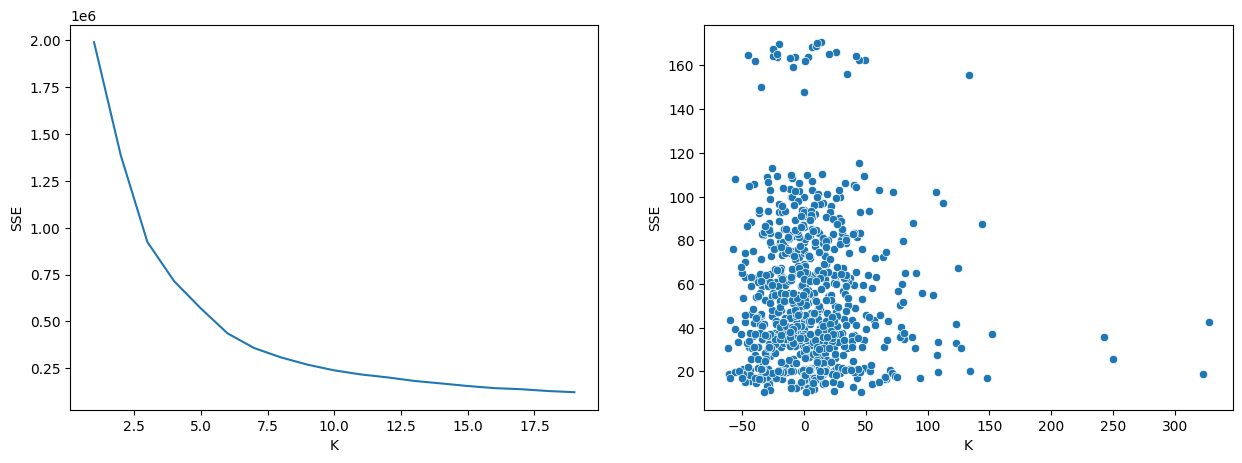

In [14]:
sse = {}
for k in range(1, kmeans_iters):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X)
    sse[k] = kmeans.inertia_

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(data=sse, ax=ax[0])
ax[0].set_xlabel("K")
ax[0].set_ylabel("SSE")

sns.scatterplot(x=X[:, 0], y=X[:, 1], ax=ax[1])
ax[1].set_xlabel("K")
ax[1].set_ylabel("SSE")

With Density Based analysis, previous week


<Axes: >

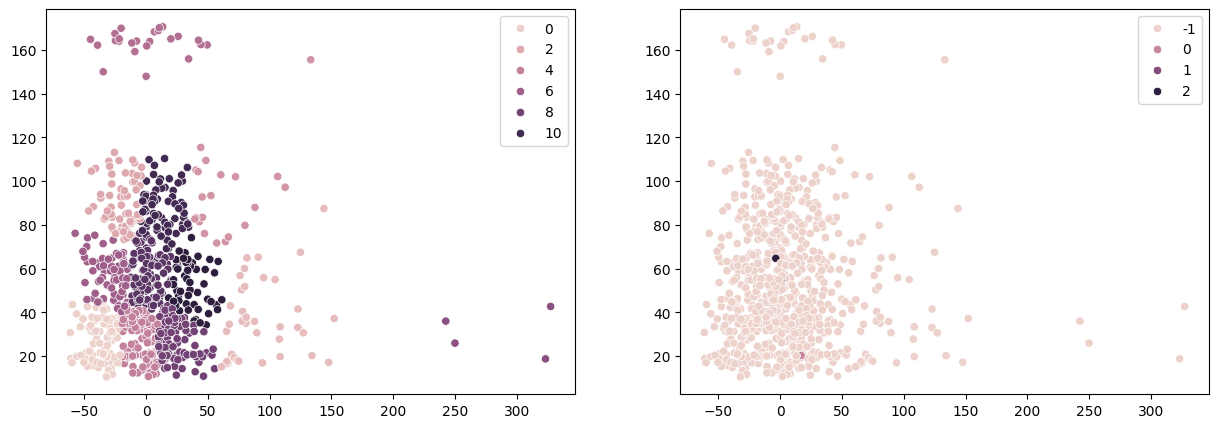

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], ax=ax[0], hue=y_pred)

y_pred = DBSCAN(eps=1, min_samples=4).fit_predict(X)
sns.scatterplot(x=X[:, 0], y=X[:, 1], ax=ax[1], hue=y_pred)

In the previous plots, we observed that values above 120 for the `close` variable and values exceeding 200 for the `percent_change_volume_over_last_wk` variable are considered outliers. This data pertains to IBM and can be analyzed separately.


In [16]:
df = df[(df["percent_change_volume_over_last_wk"] < 200) & (df["close"] < 160)]

## Prediction and Evaluation


All of the stocks together, it does not return an accurate prediction for the close price both with `previous_weeks_volume` and `percent_change_volume_over_last_wk` features. so it is better to check each stock separately.
`predictor` uses 10-Fold for each model including KNN, Decision Tree, Random Forest, and Gradient Boosting to predict and calculate MAE, RMSE, and MAPE.

In [30]:
predictor.calc_errors(
    "All Prev Wks Vol", df.loc[:, ["previous_weeks_volume"]], df.loc[:, "close"]
)

Knn MAE: 15.919234018264842
Knn RMSE: 20.98710567353311
Knn MAPE: 0.3640357095958901
----------------------------------
DecisionTree MAE: 19.19786724075177
DecisionTree RMSE: 25.821069290960235
DecisionTree MAPE: 0.4211486395869068
----------------------------------
RandomForest MAE: 17.078863677253015
RandomForest RMSE: 22.65474698191066
RandomForest MAPE: 0.3791489212262789
----------------------------------
XGBoost MAE: 16.366144214836247
XGBoost RMSE: 21.85030951127502
XGBoost MAPE: 0.3656837632697023
----------------------------------
GradientBoosting MAE: 15.188806303402632
GradientBoosting RMSE: 19.972645857024297
GradientBoosting MAPE: 0.341460213458307
----------------------------------


In [18]:
predictor.calc_errors(
    "All Last WK Vol Chng",
    df.loc[:, ["percent_change_volume_over_last_wk"]],
    df.loc[:, "close"],
)

Knn MAE: 24.512183066971083
Knn RMSE: 29.665339607028795
Knn MAPE: 0.7007727965182989
----------------------------------
DecisionTree MAE: 30.687472834359074
DecisionTree RMSE: 38.41532941263245
DecisionTree MAPE: 0.8339030363839572
----------------------------------
RandomForest MAE: 26.423769463891222
RandomForest RMSE: 32.86330757076038
RandomForest MAPE: 0.7461463251334113
----------------------------------
XGBoost MAE: 25.66724302831995
XGBoost RMSE: 30.807679977163957
XGBoost MAPE: 0.7389052211970624
----------------------------------
GradientBoosting MAE: 23.780633968861743
GradientBoosting RMSE: 28.604304897126628
GradientBoosting MAPE: 0.6887903372016806
----------------------------------


### Microsoft

In [19]:
predictor.calc_errors(
    "Microsoft",
    msft.loc[:, ["percent_change_volume_over_last_wk"]],
    msft.loc[:, "close"],
)

Knn MAE: 1.3375000000000004
Knn RMSE: 1.4037703659620646
Knn MAPE: 0.05171338027342489
----------------------------------
DecisionTree MAE: 1.845666666666667
DecisionTree RMSE: 1.9325419147604184
DecisionTree MAPE: 0.07109685888575787
----------------------------------
RandomForest MAE: 1.5646416666666643
RandomForest RMSE: 1.6340667959101076
RandomForest MAPE: 0.06046890012866054
----------------------------------
XGBoost MAE: 1.8614475364685057
XGBoost RMSE: 1.970491758545474
XGBoost MAPE: 0.07138958436723583
----------------------------------
GradientBoosting MAE: 1.7929505073168528
GradientBoosting RMSE: 1.8796546952251938
GradientBoosting MAPE: 0.0690857755549801
----------------------------------


### Cisco

In [20]:
predictor.calc_errors(
    "Cisco",
    csco.loc[:, ["percent_change_volume_over_last_wk"]],
    csco.loc[:, "close"],
)

Knn MAE: 1.8455666666666666
Knn RMSE: 1.9389065812020398
Knn MAPE: 0.10453147105785252
----------------------------------
DecisionTree MAE: 2.2469999999999994
DecisionTree RMSE: 2.496819091422638
DecisionTree MAPE: 0.12677940185207767
----------------------------------
RandomForest MAE: 1.8768966666666678
RandomForest RMSE: 2.065060199414378
RandomForest MAPE: 0.10607207410069666
----------------------------------
XGBoost MAE: 2.3121499055226638
XGBoost RMSE: 2.5633652962666753
XGBoost MAPE: 0.1323765321890064
----------------------------------
GradientBoosting MAE: 2.1996775271779465
GradientBoosting RMSE: 2.4436192540989223
GradientBoosting MAPE: 0.12407318553386557
----------------------------------


### IBM

In [21]:
predictor.calc_errors(
    "IBM",
    ibm.loc[:, ["percent_change_volume_over_last_wk"]],
    ibm.loc[:, "close"],
)

Knn MAE: 3.7707333333333324
Knn RMSE: 4.244530268783903
Knn MAPE: 0.02357798429236058
----------------------------------
DecisionTree MAE: 3.9753333333333325
DecisionTree RMSE: 4.578024340514412
DecisionTree MAPE: 0.024929266237226612
----------------------------------
RandomForest MAE: 3.6560150000000107
RandomForest RMSE: 4.0702663524062
RandomForest MAPE: 0.022988654455436977
----------------------------------
XGBoost MAE: 5.290238026936847
XGBoost RMSE: 6.399960636707704
XGBoost MAPE: 0.0328633595240863
----------------------------------
GradientBoosting MAE: 3.976473463874707
GradientBoosting RMSE: 4.571643075892688
GradientBoosting MAPE: 0.02493174459044545
----------------------------------


### Walmart

In [22]:
predictor.calc_errors(
    "Walmart",
    wmt.loc[:, ["percent_change_volume_over_last_wk"]],
    wmt.loc[:, "close"],
)

Knn MAE: 1.7007000000000008
Knn RMSE: 1.7834778196966337
Knn MAPE: 0.031526121092847
----------------------------------
DecisionTree MAE: 1.8556666666666668
DecisionTree RMSE: 2.134465508055704
DecisionTree MAPE: 0.03428767809121434
----------------------------------
RandomForest MAE: 1.7050466666666506
RandomForest RMSE: 1.8902318211390081
RandomForest MAPE: 0.031563396420378934
----------------------------------
XGBoost MAE: 1.87407181040446
XGBoost RMSE: 2.060624586741956
XGBoost MAPE: 0.03463899572972956
----------------------------------
GradientBoosting MAE: 1.825924818418894
GradientBoosting RMSE: 2.105320345374003
GradientBoosting MAPE: 0.03373766209178021
----------------------------------


### Mc Donald's

In [23]:
predictor.calc_errors(
    "Mc Donald's",
    mcd.loc[:, ["percent_change_volume_over_last_wk"]],
    mcd.loc[:, "close"],
)

Knn MAE: 2.8176333333333354
Knn RMSE: 3.0268166512498444
Knn MAPE: 0.036102503020187124
----------------------------------
DecisionTree MAE: 2.667499999999998
DecisionTree RMSE: 3.125351728042659
DecisionTree MAPE: 0.03424846008766051
----------------------------------
RandomForest MAE: 2.55233999999996
RandomForest RMSE: 2.8804255135125585
RandomForest MAPE: 0.03284553708234728
----------------------------------
XGBoost MAE: 2.840243865966797
XGBoost RMSE: 3.164547989415665
XGBoost MAPE: 0.03662170607491286
----------------------------------
GradientBoosting MAE: 2.6428064671187768
GradientBoosting RMSE: 3.094777951718059
GradientBoosting MAPE: 0.0339308407025123
----------------------------------


### JP Morgan

In [24]:
predictor.calc_errors(
    "JP Morgan",
    jpm.loc[:, ["percent_change_volume_over_last_wk"]],
    jpm.loc[:, "close"],
)

Knn MAE: 2.2815000000000007
Knn RMSE: 2.4619625988895497
Knn MAPE: 0.052638840972116165
----------------------------------
DecisionTree MAE: 3.065000000000001
DecisionTree RMSE: 3.3076274932976792
DecisionTree MAPE: 0.07022852454470814
----------------------------------
RandomForest MAE: 2.6627033333333276
RandomForest RMSE: 2.852196810644265
RandomForest MAPE: 0.06132392129140265
----------------------------------
XGBoost MAE: 2.8153126347859705
XGBoost RMSE: 3.0057934540939657
XGBoost MAPE: 0.06487243602761418
----------------------------------
GradientBoosting MAE: 2.997345764344438
GradientBoosting RMSE: 3.226295571588989
GradientBoosting MAPE: 0.0687230915547675
----------------------------------


Text(0, 0.5, 'MAPE')

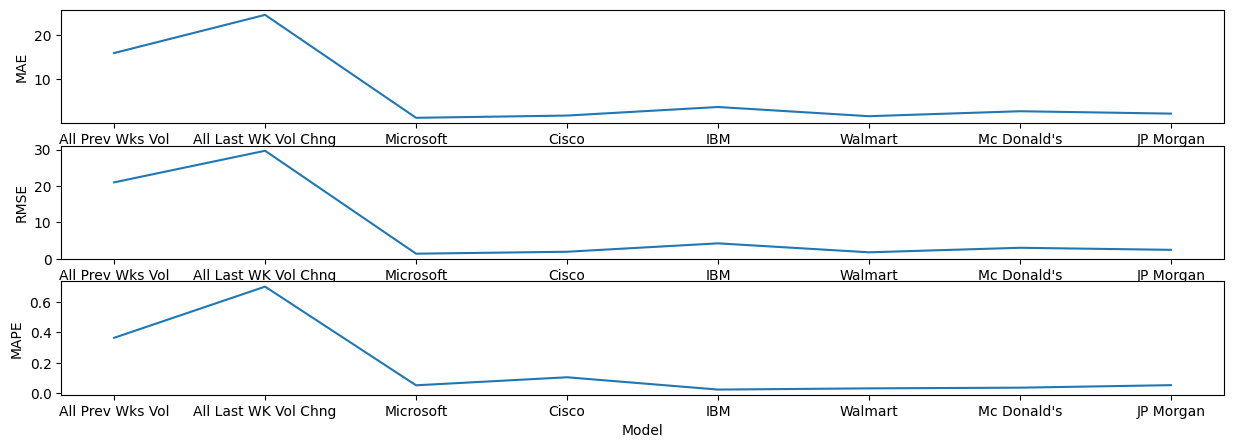

In [25]:
fig, axs = plt.subplots(3, 1)
fig.set_size_inches(15, 5)
sns.lineplot(predictor.all_errors["mae"]["Knn"], ax=axs[0])
axs[0].set_xlabel("Model")
axs[0].set_ylabel("MAE")
sns.lineplot(predictor.all_errors["rmse"]["Knn"], ax=axs[1])
axs[1].set_xlabel("Model")
axs[1].set_ylabel("RMSE")
sns.lineplot(predictor.all_errors["mape"]["Knn"], ax=axs[2])
axs[2].set_xlabel("Model")
axs[2].set_ylabel("MAPE")

Text(0, 0.5, 'MAPE')

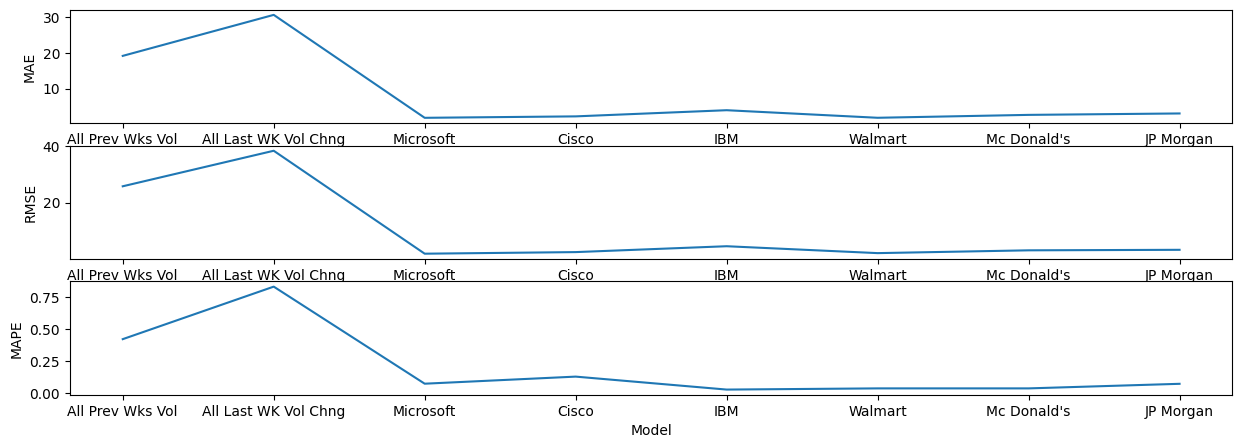

In [26]:
fig, axs = plt.subplots(3, 1)
fig.set_size_inches(15, 5)
sns.lineplot(predictor.all_errors["mae"]["DecisionTree"], ax=axs[0])
axs[0].set_xlabel("Model")
axs[0].set_ylabel("MAE")
sns.lineplot(predictor.all_errors["rmse"]["DecisionTree"], ax=axs[1])
axs[1].set_xlabel("Model")
axs[1].set_ylabel("RMSE")
sns.lineplot(predictor.all_errors["mape"]["DecisionTree"], ax=axs[2])
axs[2].set_xlabel("Model")
axs[2].set_ylabel("MAPE")

Text(0, 0.5, 'MAPE')

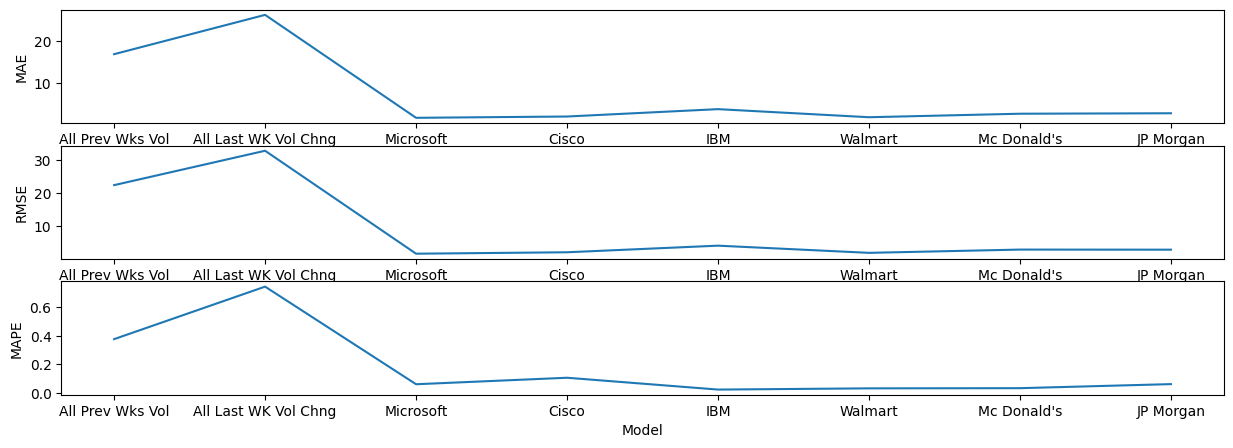

In [27]:
fig, axs = plt.subplots(3, 1)
fig.set_size_inches(15, 5)
sns.lineplot(predictor.all_errors["mae"]["RandomForest"], ax=axs[0])
axs[0].set_xlabel("Model")
axs[0].set_ylabel("MAE")
sns.lineplot(predictor.all_errors["rmse"]["RandomForest"], ax=axs[1])
axs[1].set_xlabel("Model")
axs[1].set_ylabel("RMSE")
sns.lineplot(predictor.all_errors["mape"]["RandomForest"], ax=axs[2])
axs[2].set_xlabel("Model")
axs[2].set_ylabel("MAPE")

Text(0, 0.5, 'MAPE')

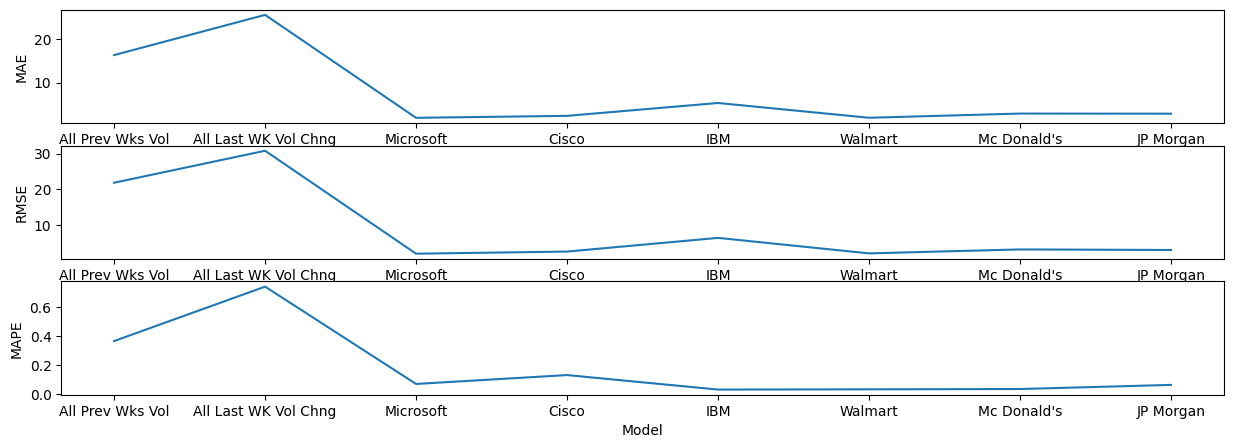

In [28]:
fig, axs = plt.subplots(3, 1)
fig.set_size_inches(15, 5)
sns.lineplot(predictor.all_errors["mae"]["XGBoost"], ax=axs[0])
axs[0].set_xlabel("Model")
axs[0].set_ylabel("MAE")
sns.lineplot(predictor.all_errors["rmse"]["XGBoost"], ax=axs[1])
axs[1].set_xlabel("Model")
axs[1].set_ylabel("RMSE")
sns.lineplot(predictor.all_errors["mape"]["XGBoost"], ax=axs[2])
axs[2].set_xlabel("Model")
axs[2].set_ylabel("MAPE")

Text(0, 0.5, 'MAPE')

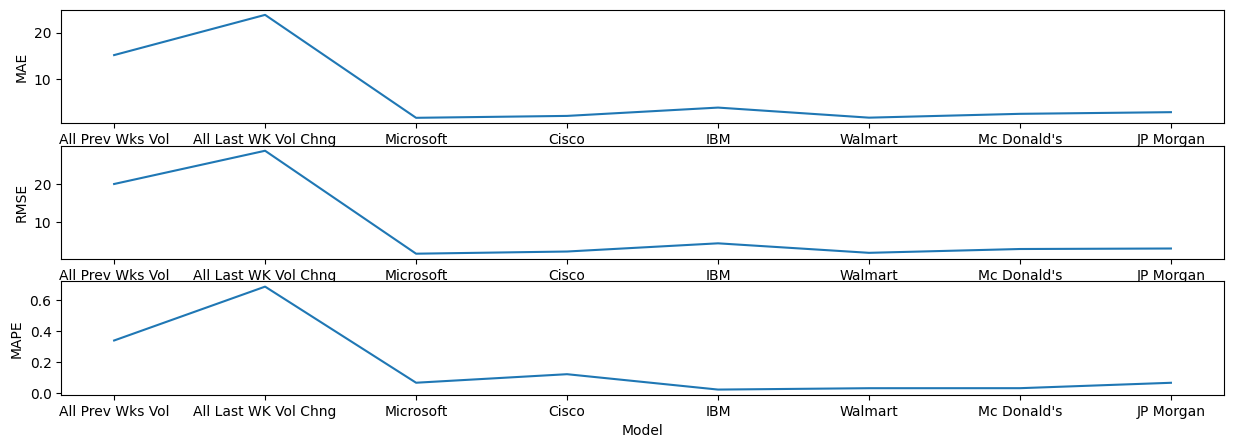

In [29]:
fig, axs = plt.subplots(3, 1)
fig.set_size_inches(15, 5)
sns.lineplot(predictor.all_errors["mae"]["GradientBoosting"], ax=axs[0])
axs[0].set_xlabel("Model")
axs[0].set_ylabel("MAE")
sns.lineplot(predictor.all_errors["rmse"]["GradientBoosting"], ax=axs[1])
axs[1].set_xlabel("Model")
axs[1].set_ylabel("RMSE")
sns.lineplot(predictor.all_errors["mape"]["GradientBoosting"], ax=axs[2])
axs[2].set_xlabel("Model")
axs[2].set_ylabel("MAPE")

# Conclusion
Considering the price changes from the previous week can yield accurate predictions for the closing price in the current week.